<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-libraries" data-toc-modified-id="Import-libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import libraries</a></span></li><li><span><a href="#Read-raw-temperature-data" data-toc-modified-id="Read-raw-temperature-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Read raw temperature data</a></span><ul class="toc-item"><li><span><a href="#🥊-Challenge:-What-is-the-average-global-land-ocean-temperature-anomaly?" data-toc-modified-id="🥊-Challenge:-What-is-the-average-global-land-ocean-temperature-anomaly?-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>🥊 Challenge: What is the average global land ocean temperature anomaly?</a></span></li></ul></li><li><span><a href="#Plot-global-temperature-change" data-toc-modified-id="Plot-global-temperature-change-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Plot global temperature change</a></span><ul class="toc-item"><li><span><a href="#🥊-Challenge:-Can-you-plot-the-changes-in-global-CO2-emissions?" data-toc-modified-id="🥊-Challenge:-Can-you-plot-the-changes-in-global-CO2-emissions?-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>🥊 Challenge: Can you plot the changes in global CO2 emissions?</a></span></li></ul></li></ul></div>

Global land and ocean temperature anomolies data.   
Download raw dataset from NOAA: https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/global/time-series/globe/land_ocean/all/1/1850-2023

# Import libraries

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Dataset name: Global land and ocean temperature anomolies  
Units: Degrees Celsius  
Base period: 1901-2000  
Missing value: -999

# Read raw temperature data

In [2]:
# Read the raw data for global land and ocean temperature anomolies
land_ocean_temp_raw = pd.read_csv('data.csv')

# Examine the first 5 rows of the dataset
land_ocean_temp_raw.head(5)

,Year,Anomaly
0,185001,-0.38
1,185002,-0.14
2,185003,-0.24
3,185004,-0.20
4,185005,-0.20


In [3]:
# Check the data types of the columns
land_ocean_temp_raw.dtypes

Year         int64
Anomaly    float64
dtype: object

In [4]:
# Extract month and year from the 'Year' column
land_ocean_temp_raw['year'] = land_ocean_temp_raw['Year'].astype(str).str[:4]
land_ocean_temp_raw['month'] = land_ocean_temp_raw['Year'].astype(str).str[4:]
land_ocean_temp_raw.head()

,Year,Anomaly,year,month
0,185001,-0.38,1850,01
1,185002,-0.14,1850,02
2,185003,-0.24,1850,03
3,185004,-0.20,1850,04
4,185005,-0.20,1850,05


In [5]:
# Create new dataframe with cleaned columns: year, month, Anomaly
land_ocean_temp_df = land_ocean_temp_raw[['year', 'month', 'Anomaly']]
land_ocean_temp_df.head()

,year,month,Anomaly
0,1850,01,-0.38
1,1850,02,-0.14
2,1850,03,-0.24
3,1850,04,-0.20
4,1850,05,-0.20


## 🥊 Challenge: What is the average global land ocean temperature anomaly?

Write your code in the cell below:

In [6]:
# Your code here
land_ocean_temp_df.Anomaly.mean()

0.05143678160919532

In [7]:
# Calculate the average temperature anomaly by year
avg_annual_temp = land_ocean_temp_df.groupby('year').mean()
avg_annual_temp.head()

,Anomaly
year,
1850,-0.170000
1851,-0.089167
1852,-0.100000
1853,-0.116667
1854,-0.110833


In [8]:
# Reset the index of the pandas dataframe
avg_annual_temp_reset = avg_annual_temp.reset_index()
avg_annual_temp_reset.head()

,year,Anomaly
0,1850,-0.170000
1,1851,-0.089167
2,1852,-0.100000
3,1853,-0.116667
4,1854,-0.110833


# Plot global temperature change

Now let's plot the average annual temperature change from 1850 to 2023

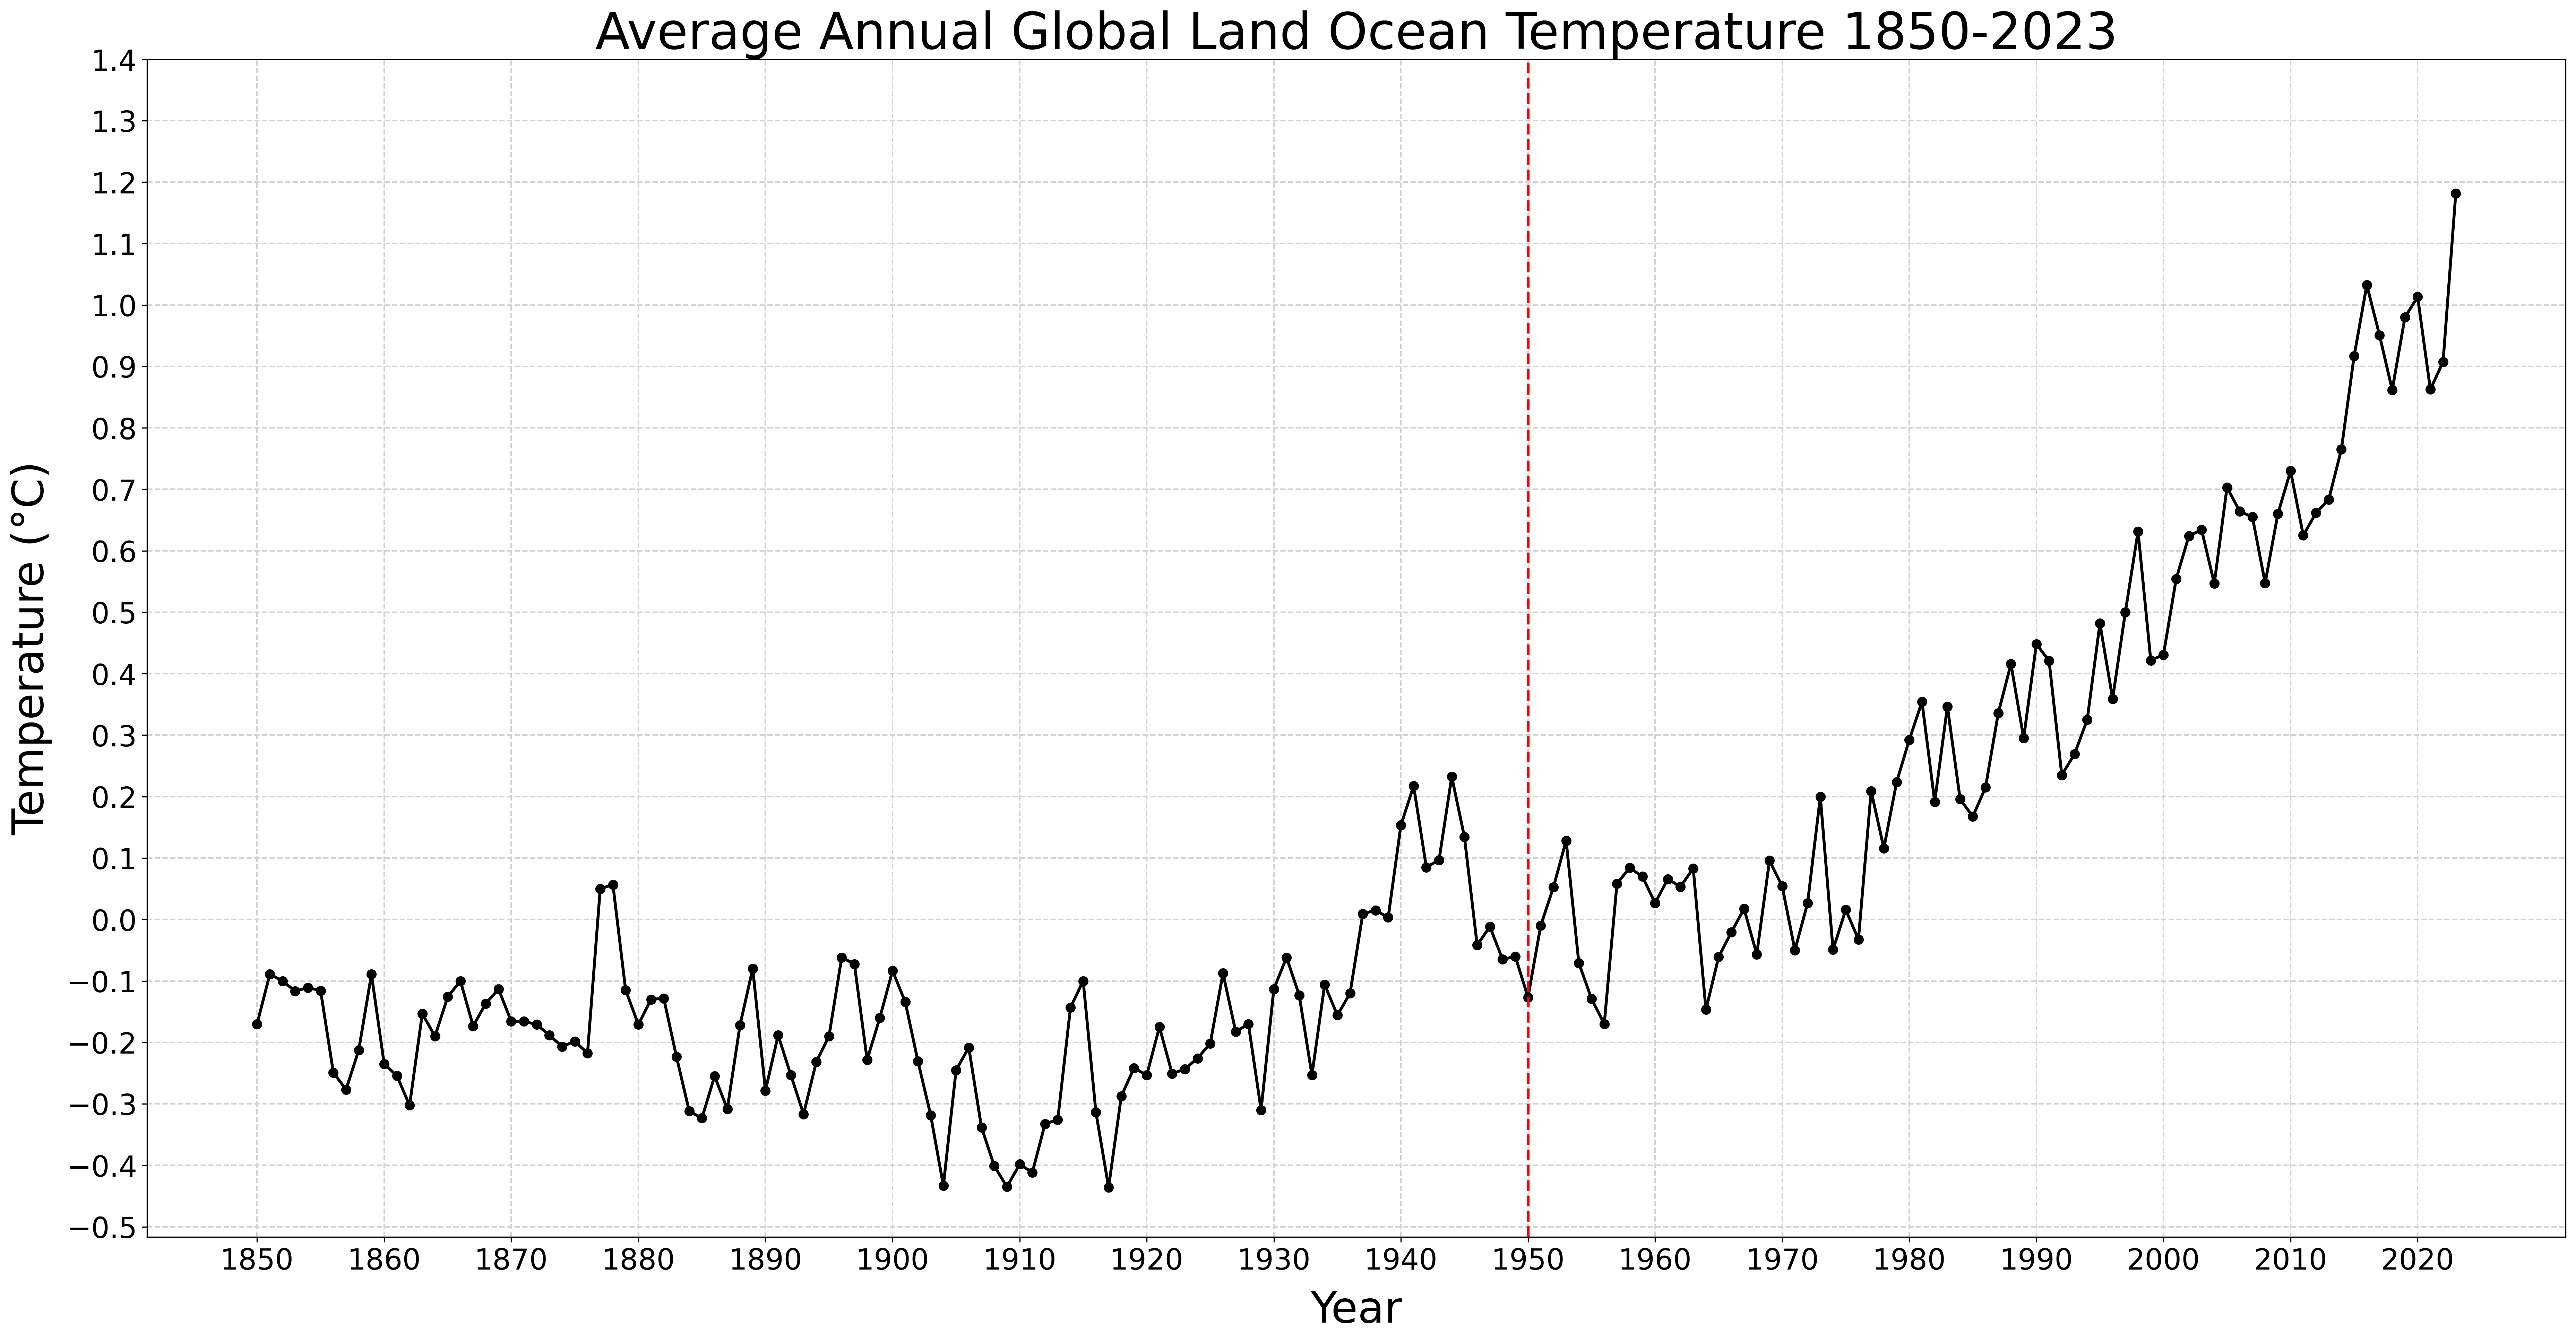

In [9]:
# Set the resolution and figure size
plt.figure(dpi=300, figsize=(30,15))

# Line plot with matplotlib
plt.plot(avg_annual_temp_reset.year.astype(int), avg_annual_temp_reset.Anomaly,
         marker='o', linewidth=2, color='k')

# Format the ticks for horizontal and vertical axes
plt.xticks(np.arange(1850, 2030, step=10), fontsize=20);
plt.yticks(np.arange(-0.5, 1.5, step=0.1), fontsize=20);

# Add figure title and create labels for horizontal and vertical axes
plt.xlabel('Year', fontsize=30, labelpad=10)
plt.ylabel('Temperature (°C)', fontsize=30, labelpad=10)
plt.title(f'Average Annual Global Land Ocean Temperature {avg_annual_temp_reset.year.astype(int).min()}-{avg_annual_temp_reset.year.astype(int).max()}', fontsize=35)

# Plot a vertical line showing the 1950 cutoff
plt.axvline(x=1950, color='r', linestyle='--', linewidth=2)

# Show grid
plt.grid(True, color='lightgrey', linestyle='--', linewidth=1, zorder=0)

## 🥊 Challenge: Can you plot the changes in global CO2 emissions?

Inside the file "ghg-emissions.csv" you will find a time series of global CO2 emissions. The data is downloaded from the World Resources Institute: https://www.wri.org/insights/history-carbon-dioxide-emissions Can you load the data, clean it and plot the changes in global CO2 emissions?

Write your code in the cell below:

In [12]:
# Your code here
# Read in pandas data
CO2_emission_raw = pd.read_csv('ghg-emissions.csv')
CO2_emission_raw.head(5)

,iso,Country/Region,unit,1850,1851,1852,1853,1854,1855,1856,...,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
0,WORLD,World,MtCO2e,204.0,207.0,216.0,227.0,267.0,272.0,290.0,...,6760.0,6860.0,7070.0,7250.0,7960.0,8480.0,8780.0,9080.0,9590.0,10100.0
1,Data source,PIK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Data for,Location: World. Sectors/Subsectors: . Gases: ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# Slicing the dataframe keeping the timeseries of CO2 emission records
CO2_emission_df = CO2_emission_raw.iloc[:1,3:]
CO2_emission_df

,1850,1851,1852,1853,1854,1855,1856,1857,1858,1859,...,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
0,204.0,207.0,216.0,227.0,267.0,272.0,290.0,294.0,298.0,316.0,...,6760.0,6860.0,7070.0,7250.0,7960.0,8480.0,8780.0,9080.0,9590.0,10100.0


In [33]:
# Transpose the dataframe, reset index and rename the columns
CO2_emission_df = CO2_emission_df.T.reset_index().rename(columns={'index': 'year', 0: 'MTCO2e'})
CO2_emission_df

,year,MTCO2e
0,1850,204.0
1,1851,207.0
2,1852,216.0
3,1853,227.0
4,1854,267.0
...,...,...
106,1956,8480.0
107,1957,8780.0
108,1958,9080.0
109,1959,9590.0


In [34]:
# Check the data types of the columns
CO2_emission_df.dtypes

year       object
MTCO2e    float64
dtype: object

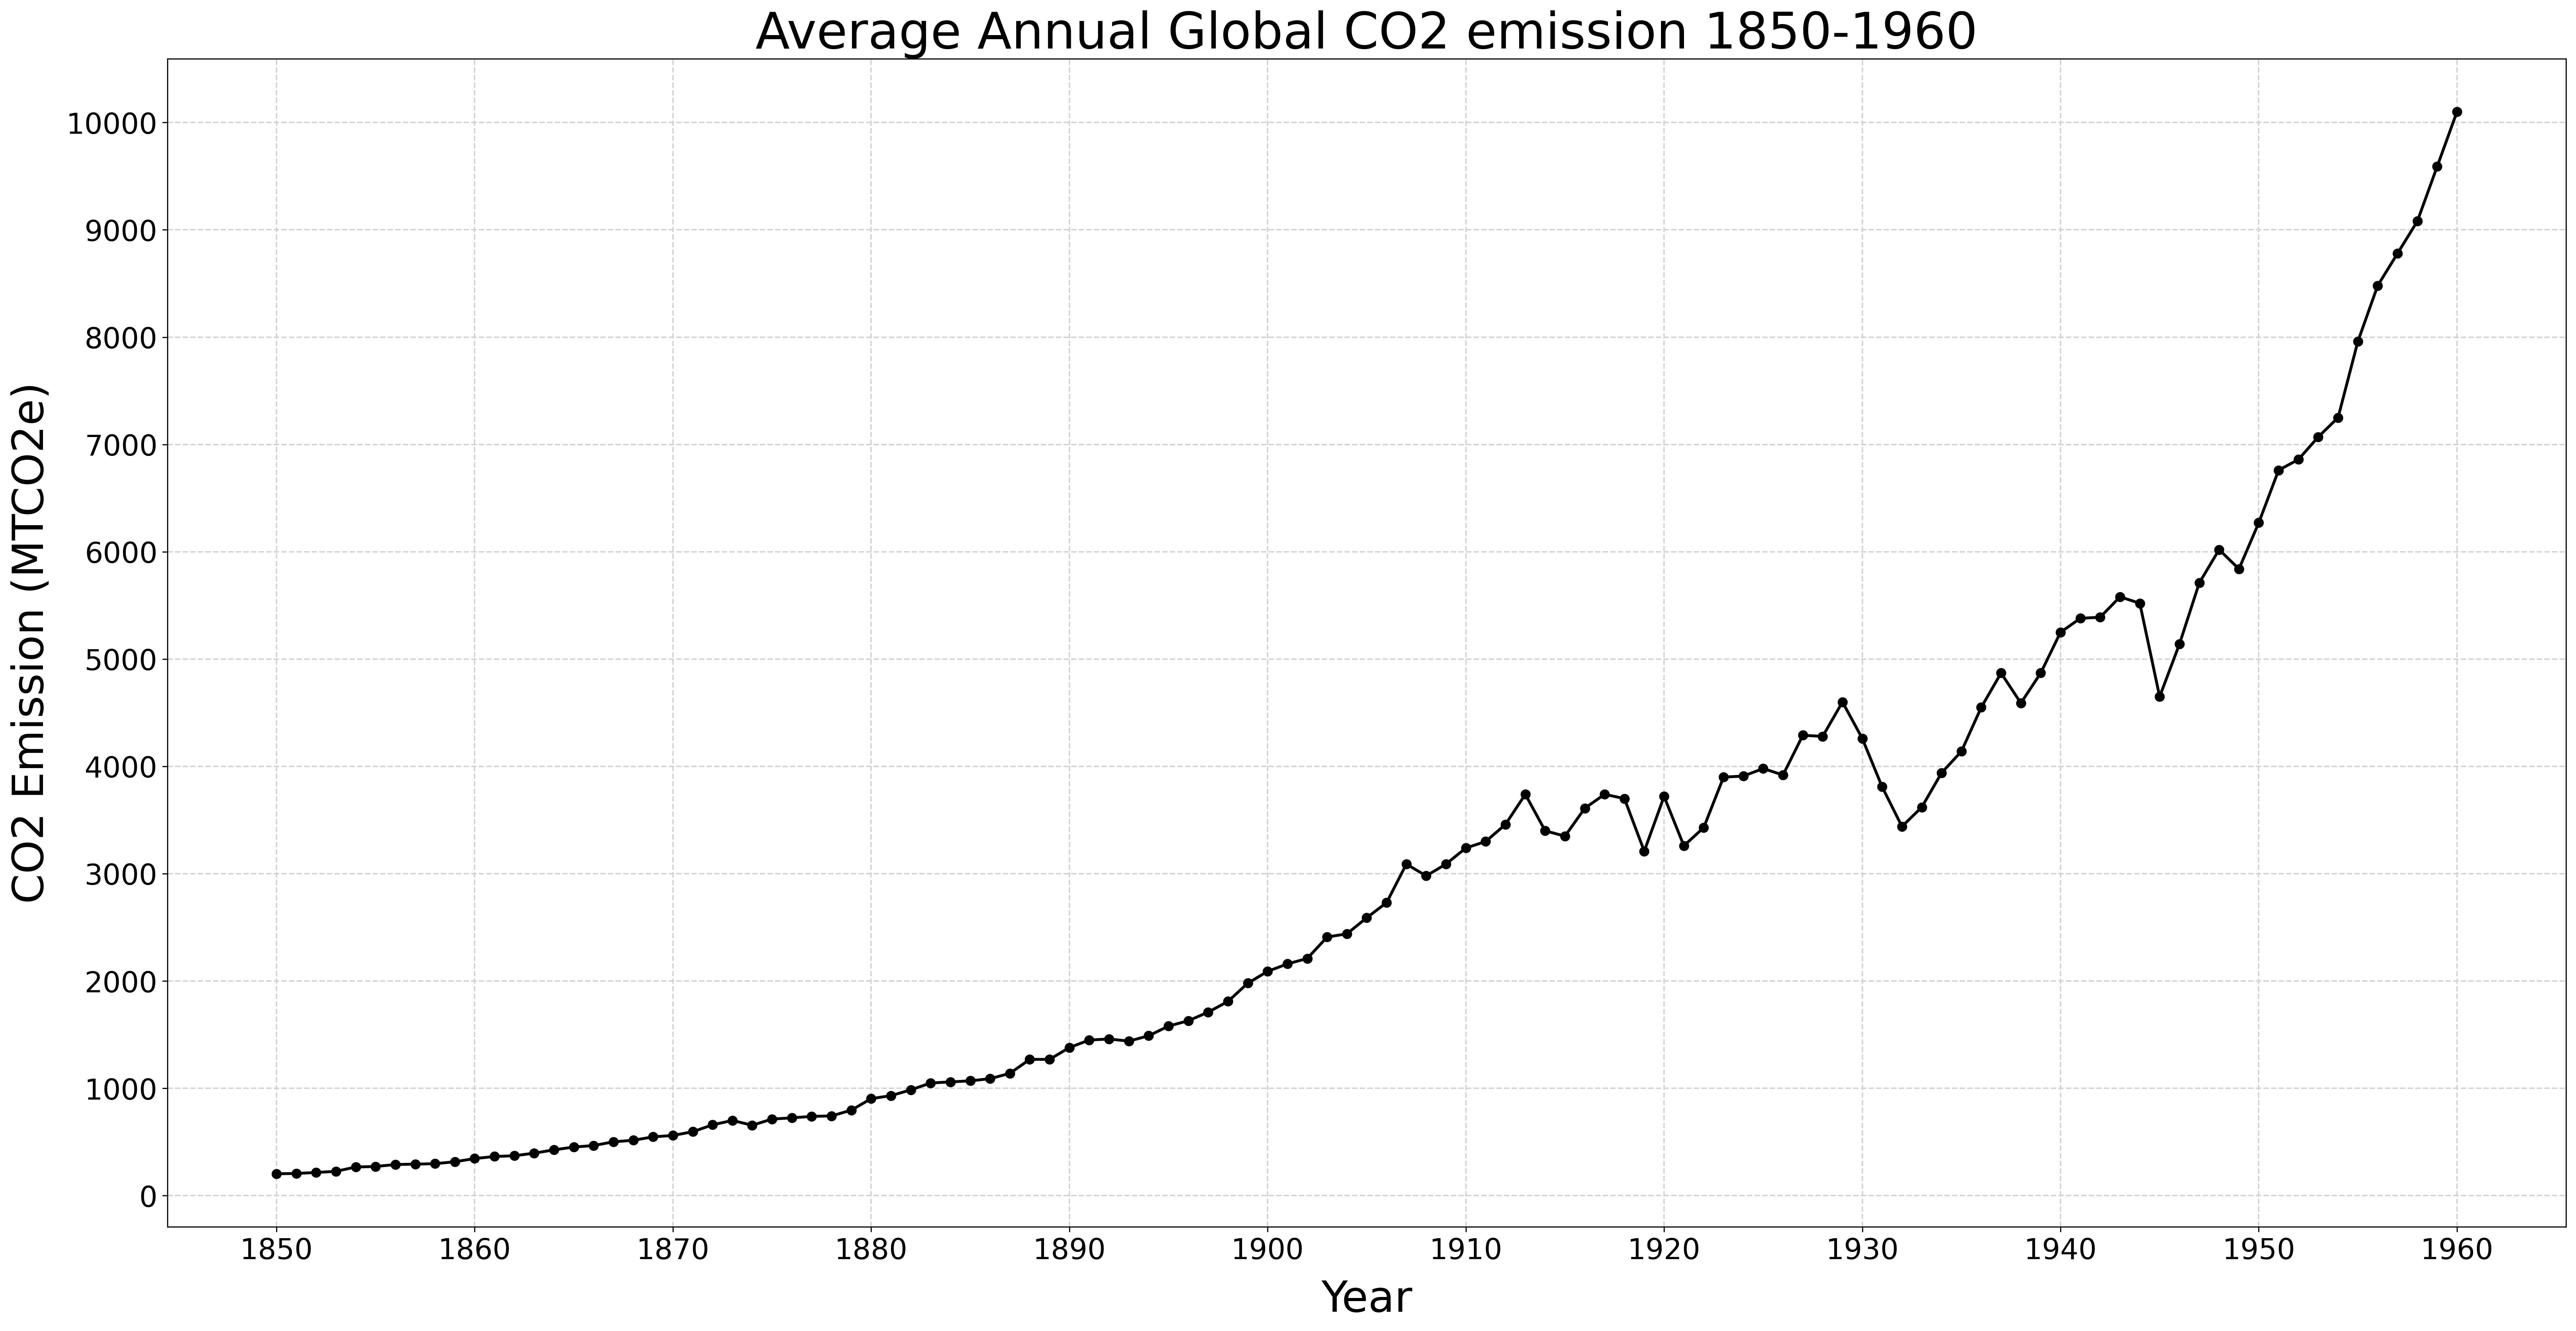

In [45]:
# Set the resolution and figure size
plt.figure(dpi=300, figsize=(30,15))

# Line plot with matplotlib
plt.plot(CO2_emission_df.year.astype(int), CO2_emission_df.MTCO2e,
         marker='o', linewidth=2, color='k')

# Format the ticks for horizontal and vertical axes
plt.xticks(np.arange(1850, 1970, step=10), fontsize=20);
plt.yticks(np.arange(0, 11000, step=1000), fontsize=20);

# Add figure title and create labels for horizontal and vertical axes
plt.xlabel('Year', fontsize=30, labelpad=10)
plt.ylabel('CO2 Emission (MTCO2e)', fontsize=30, labelpad=10)
plt.title(f'Average Annual Global CO2 emission {CO2_emission_df.year.astype(int).min()}-{CO2_emission_df.year.astype(int).max()}', fontsize=35)

# Show grid
plt.grid(True, color='lightgrey', linestyle='--', linewidth=1, zorder=0)